In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re
from dateutil.parser import parse

In [2]:
data_maddow = pd.read_csv('data/Maddow_cleaned.tsv',sep='\t').drop(columns=['Unnamed: 0'])
data_carlson = pd.read_csv('data/Carlson_cleaned.tsv',sep='\t').drop(columns=['Unnamed: 0'])

In [3]:
# restrict data to only 2022 
data_maddow['timestamp'] = pd.to_datetime(data_maddow['timestamp'])
data_maddow = data_maddow[data_maddow['timestamp'].dt.year == 2022]
data_carlson['timestamp'] = pd.to_datetime(data_carlson['timestamp'])
data_carlson = data_carlson[data_carlson['timestamp'].dt.year == 2022]

# Maddow data is only until September 2022 so let's restrict Carlson to the same 
data_carlson = data_carlson[~data_carlson['timestamp'].dt.month.isin([10, 11, 12])]
data_carlson= data_carlson.reset_index(drop = True)

### Word Count

In [4]:
def word_count(text):
    # split the text into words and convert them to lowercase
    words = [word.lower() for word in text.split()]

    # use the Counter class to count the occurrences of each word
    word_counts = Counter(words)

    # return the word counts
    return dict(word_counts)

In [5]:
# add a word count dictionary to each of the transcript files 
data_maddow['wc_dict'] = [word_count(text) for text in data_maddow['stop words removed']]
data_carlson['wc_dict'] = [word_count(text) for text in data_carlson['stop words removed']]

### Visualizing word count frequency for a given transcript

In [6]:
def plot_word_counts(word_counts):
    # sort the word counts by frequency in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # get the top 10 words and their counts
    top_words = sorted_word_counts[:10]
    words, counts = zip(*top_words)

    # create a bar plot of the word counts
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Counts")
    plt.title("Top 10 Most Frequent Words")
    plt.xticks(rotation=45)
    plt.show()

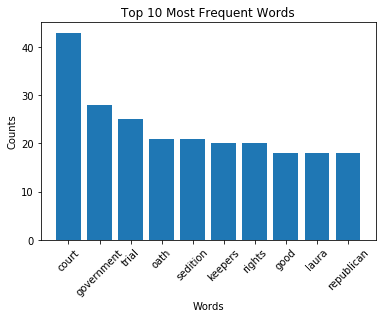

In [7]:
# Let's explore the first transcript
plot_word_counts(data_maddow['wc_dict'][0])

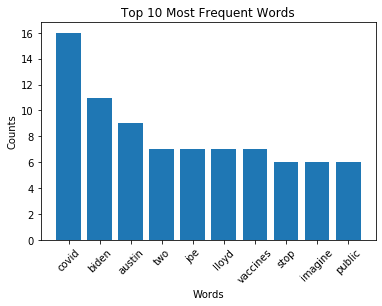

In [8]:
plot_word_counts(data_carlson['wc_dict'][0])

In [9]:
def plot_word_counts_over_time(df, host):
    
    # Create a dictionary to store the frequency of each word over time
    word_frequencies = {}

    # Iterate over the rows in the dataframe
    for i, row in df.iterrows():
        # Get the word count dictionary for this row
        word_counts = row['wc_dict']

        # Add the word counts for this row to the dictionary
        for word, count in word_counts.items():
            if word not in word_frequencies:
                word_frequencies[word] = []
            word_frequencies[word].append((row['timestamp'].to_pydatetime(), count))

    # Sort the words by the total frequency across all word count dictionaries
    sorted_words = sorted(word_frequencies.keys(), key=lambda word: sum(count for name, count in word_frequencies[word]), reverse=True)
     
    
    
    # Plot the top 10 most frequent words
    for i, word in enumerate(sorted_words[:10]):
        x, y = zip(*word_frequencies[word])
        plt.plot(x, y, label=word)
    
    title = "Top 10 Most Frequent Words Over Time: " + host
    
    plt.legend()
    plt.xlabel("Timestamp", fontsize=12, fontweight='bold')
    plt.ylabel("Frequency", fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.gcf().set_size_inches(10, 6)
    plt.xticks(rotation=45)
    plt.show()



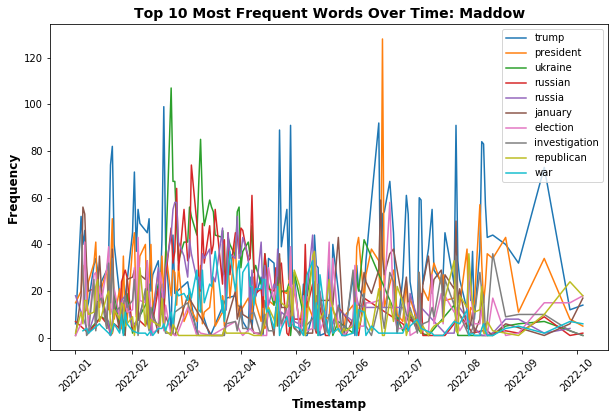

In [10]:
plot_word_counts_over_time(data_maddow, "Maddow")

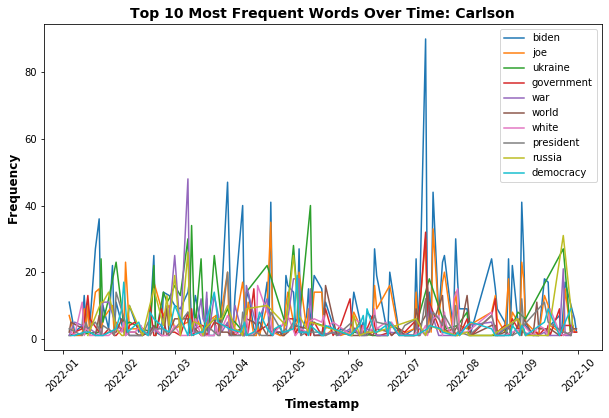

In [11]:
plot_word_counts_over_time(data_carlson, "Carlson")

### Ratio of stop words to non-stop words 

In [12]:
def word_ratio(string1, string2):
    # split the two strings into lists of words
    words1 = string1.split()
    words2 = string2.split()

    # get the ratio of the number of words in string1 to string2
    ratio = len(words1) / len(words2)

    # return the ratio as a float rounded to two decimal places
    return round(ratio, 2)

In [13]:
data_maddow['ratio'] = data_maddow.apply(lambda row: word_ratio(row['transcript'], row['stop words removed']), axis=1)
data_carlson['ratio'] = data_carlson.apply(lambda row: word_ratio(row['transcript'], row['stop words removed']), axis=1)

In [14]:
#average stop word ratio Maddow
avg_ratio = round(data_maddow['ratio'].mean(), 2)

# print the average ratio
print(avg_ratio)

2.36


In [15]:
#average stop word ratio Carlson
avg_ratio = round(data_carlson['ratio'].mean(), 2)

# print the average ratio
print(avg_ratio)

2.45
